In [25]:
import pandas as pd  # Pour la manipulation des données sous forme de DataFrame
import numpy as np  # Pour les opérations mathématiques et numériques
import matplotlib.pyplot as plt  # Pour la visualisation des données
import seaborn as sns  # Pour une visualisation plus avancée des données
import csv

In [26]:
# Charger le fichier CSV dans une DataFrame
df = pd.read_csv('1-billets.csv', delimiter=';')

df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [27]:
# Afficher les premières lignes des données
df.head()

# Afficher les dernières lignes des données
df.tail()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25
1499,False,171.47,104.15,103.82,4.63,3.37,112.07


In [28]:
# Afficher le nombre de lignes et de colonnes de la DataFrame
print("Nombre de lignes :", df.shape[0])
print("Nombre de colonnes :", df.shape[1])

Nombre de lignes : 1500
Nombre de colonnes : 7


In [29]:
# Calculer les informations statistiques de toutes les variables
statistics = df.describe()

# Afficher les informations statistiques
statistics

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [30]:
# Vérifier les valeurs manquantes dans les données
valeurs_man = df.isnull().sum()

# Afficher les informations sur les valeurs manquantes
valeurs_man

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [31]:

from sklearn.linear_model import LinearRegression

# Diviser les données en ensembles complet et incomplet pour la variable cible
complete_data = df.dropna()  # Ensemble complet avec des valeurs non manquantes
incomplete_data = df[df['margin_low'].isnull()]  # Ensemble avec des valeurs manquantes pour la variable cible

# Séparer les variables d'entrée (X) et la variable de sortie (y) pour l'ensemble complet
X_complete = complete_data.drop('margin_low', axis=1)
y_complete = complete_data['margin_low']

# Créer un modèle de régression linéaire et l'entraîner sur l'ensemble complet
regression_model = LinearRegression()
regression_model.fit(X_complete, y_complete)

# Prédire les valeurs manquantes de la variable cible à l'aide du modèle de régression linéaire
predicted_values = regression_model.predict(incomplete_data.drop('margin_low', axis=1))

# Remplacer les valeurs manquantes dans la DataFrame d'origine par les valeurs prédites
df.loc[df['margin_low'].isnull(), 'margin_low'] = predicted_values

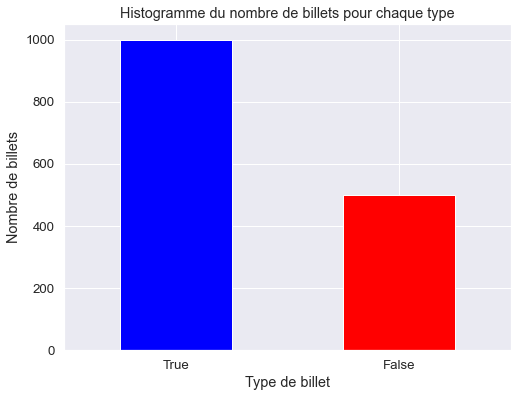

In [32]:
# Histogramme du nombre de billets pour chaque type
plt.figure(figsize=(8, 6))
colors = ['blue', 'red']
df['is_genuine'].value_counts().plot(kind='bar', color=colors)

plt.title('Histogramme du nombre de billets pour chaque type')
plt.xlabel('Type de billet')
plt.ylabel('Nombre de billets')
plt.xticks(rotation=0)
plt.show()


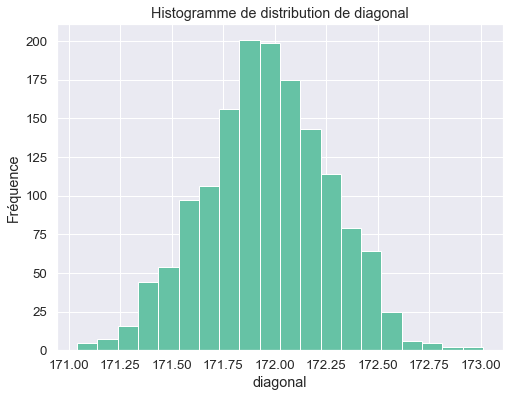

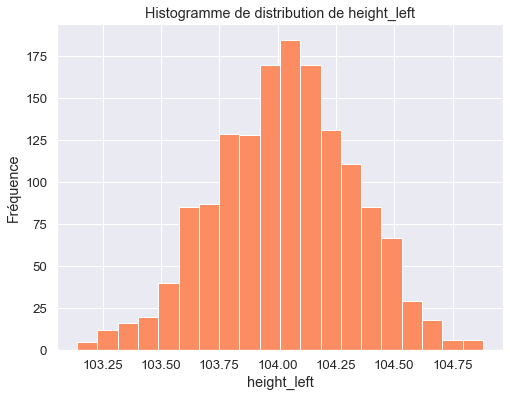

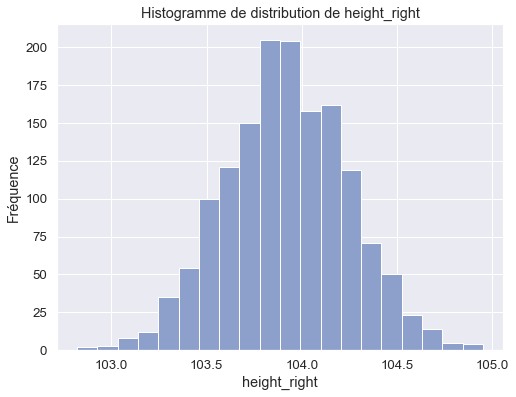

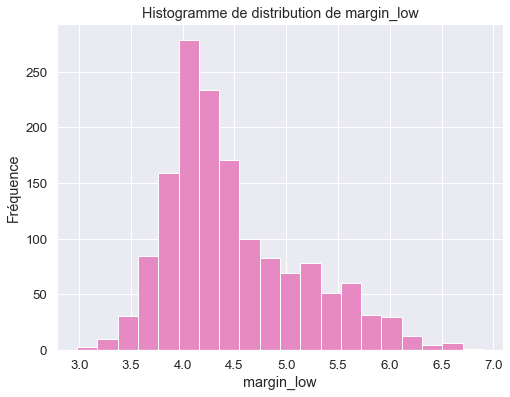

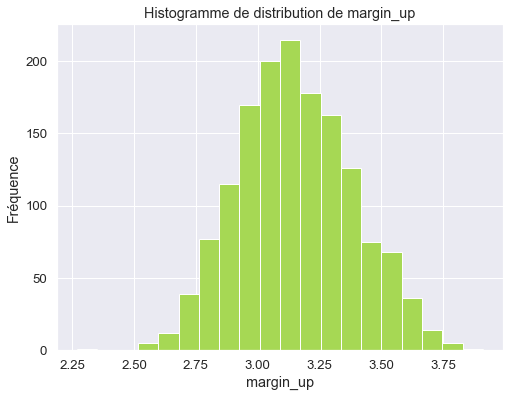

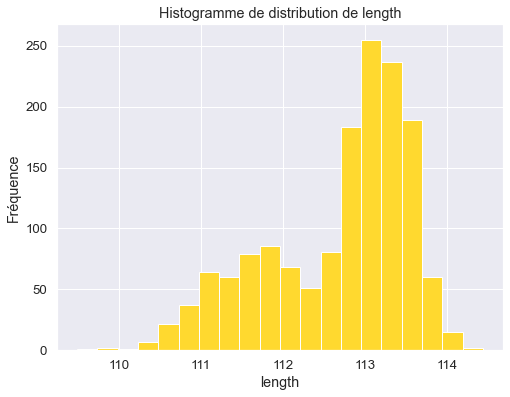

In [35]:
'''# Histogrammes de distribution des autres variables
variables = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan'] 

for variable in variables:
    plt.figure(figsize=(8, 6))
    df[variable].plot(kind='hist', bins=20, color=colors)
    plt.title(f'Histogramme de distribution de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Fréquence')
    plt.show()'''
    
# Palette de couleurs prédéfinie dans Seaborn
variables = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']
colors = sns.color_palette('Set2', len(variables))

# Histogrammes de distribution des autres variables
variables = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']

for i, variable in enumerate(variables):
    plt.figure(figsize=(8, 6))
    df[variable].plot(kind='hist', bins=20, color=colors[i])
    plt.title(f'Histogramme de distribution de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Fréquence')
    plt.show()

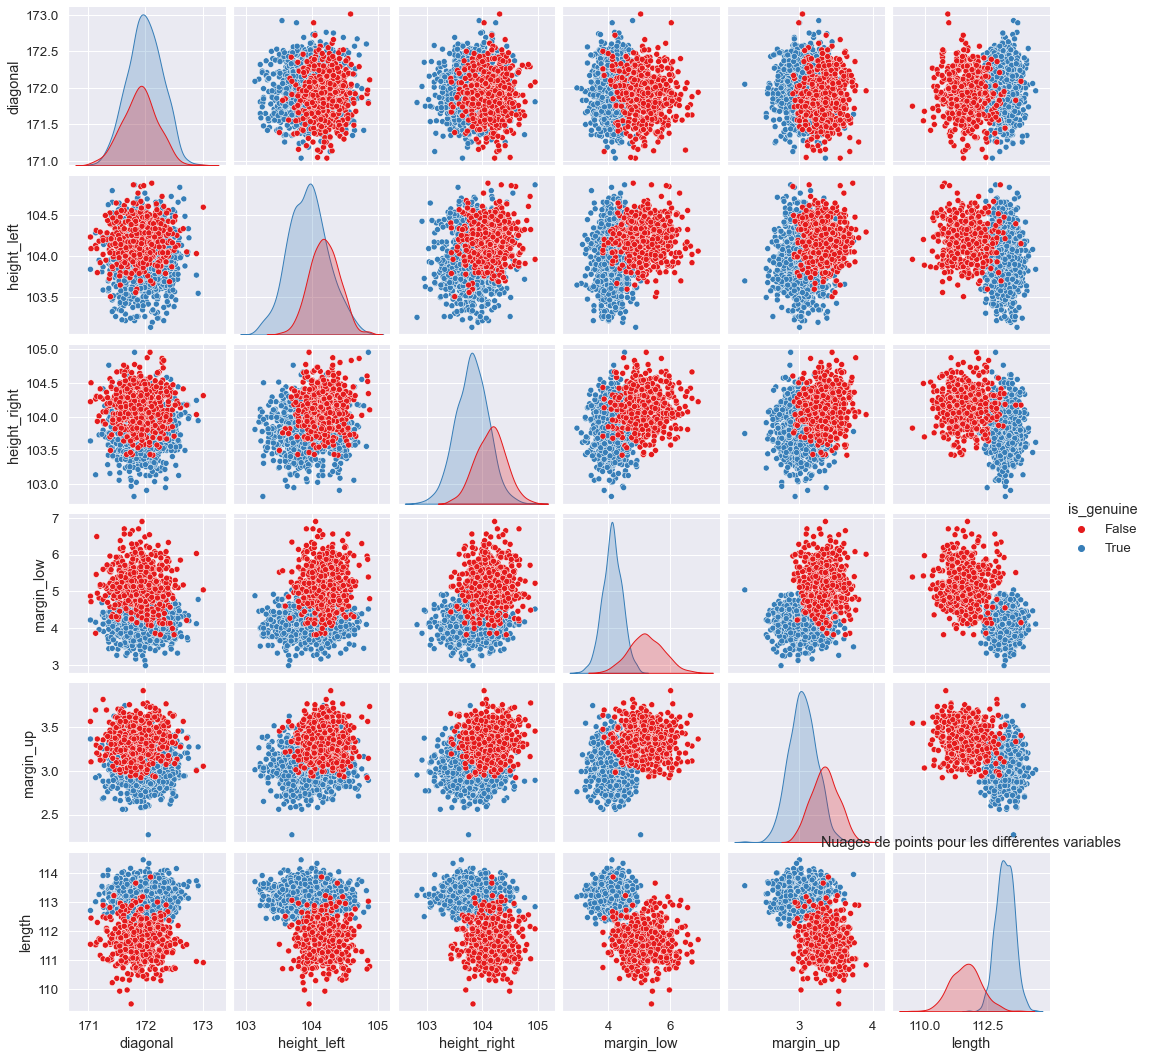

In [36]:

# Pairplot - Nuages de points avec couleurs
sns.pairplot(df, hue='is_genuine', palette='Set1')
plt.title('Nuages de points pour les différentes variables')
plt.show()



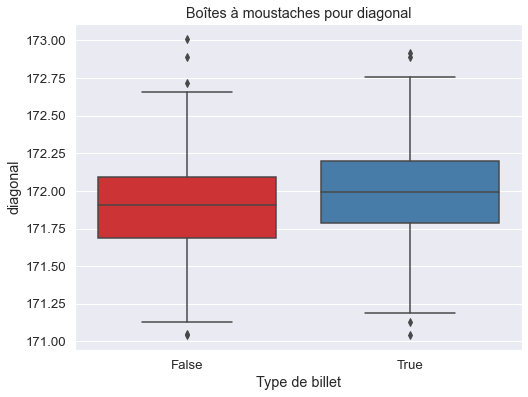

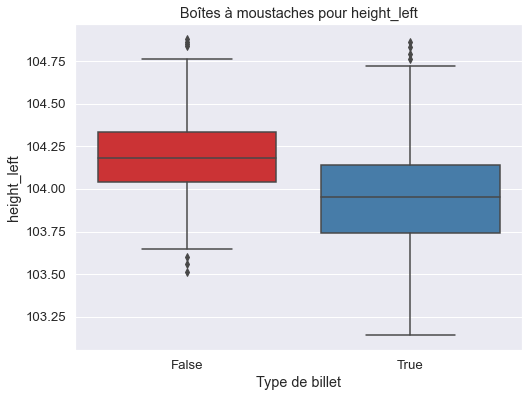

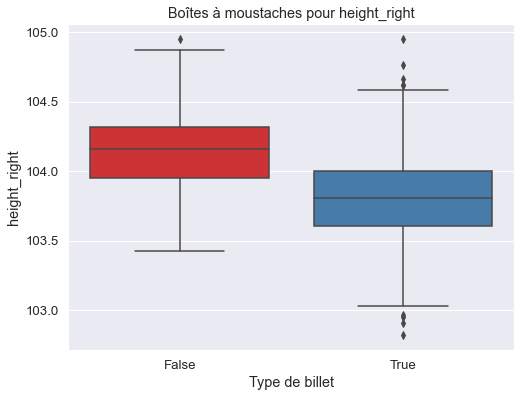

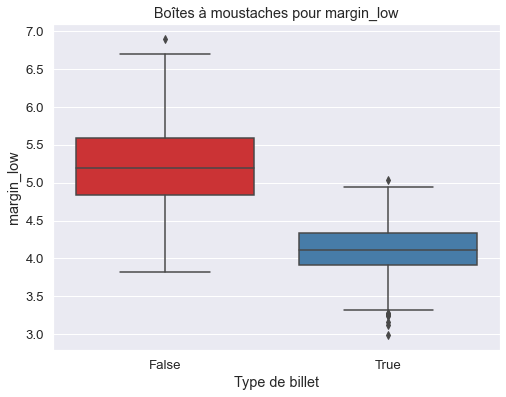

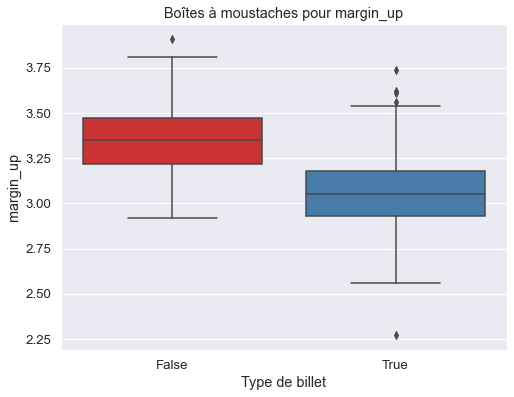

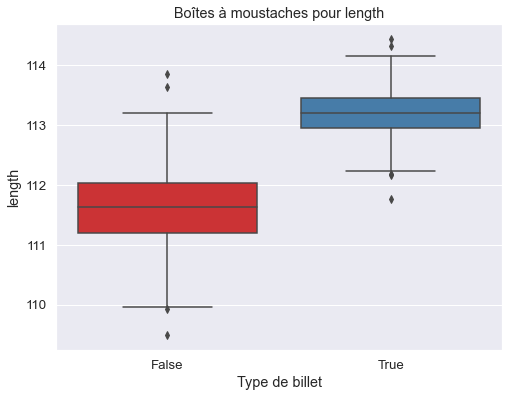

In [37]:
# Boîtes à moustaches avec couleurs
variables = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']

for variable in variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='is_genuine', y=variable, data=df, palette='Set1')
    plt.title(f'Boîtes à moustaches pour {variable}')
    plt.xlabel('Type de billet')
    plt.ylabel(variable)
    plt.show()

<Figure size 720x576 with 0 Axes>

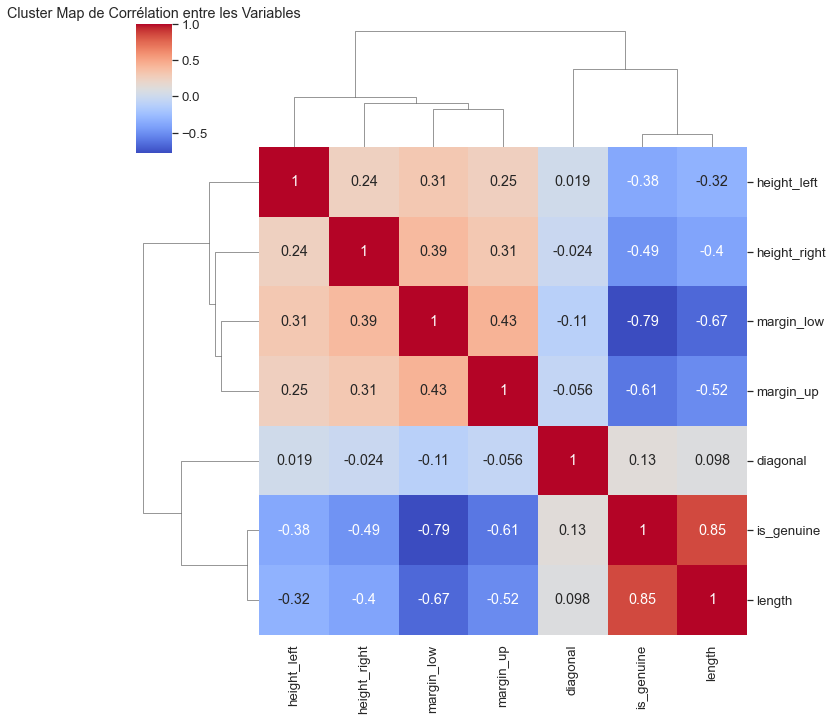

In [38]:
# Calculer la matrice de corrélation
correlation_matrix = df.corr()

# Afficher le cluster map de corrélation
plt.figure(figsize=(10, 8))
sns.clustermap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Cluster Map de Corrélation entre les Variables')
plt.show()

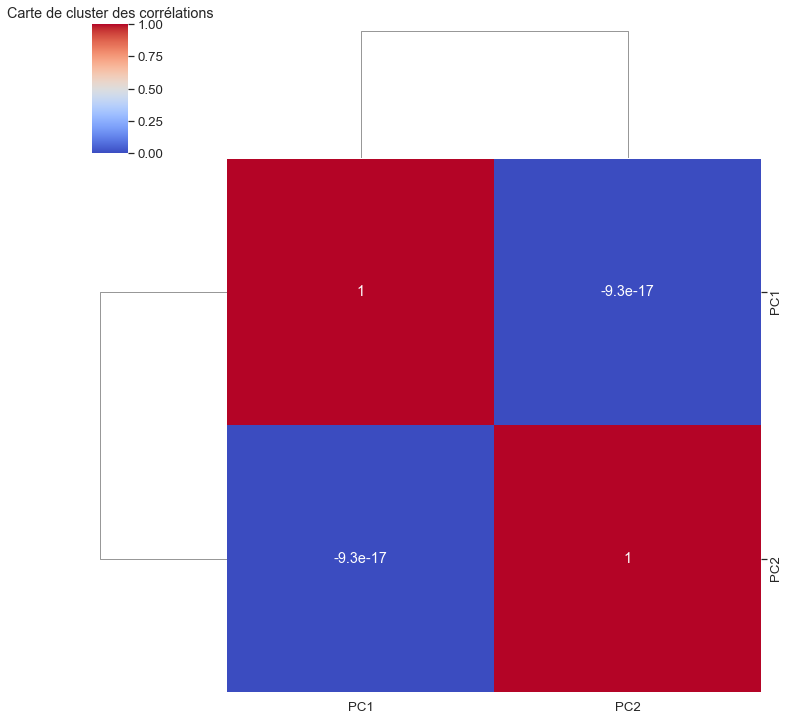

In [79]:
#PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Copie du dataframe df pour sauvegarde
df_ACP = df.copy()

# Séparer les variables indépendantes
# Sélection des variables d'intérêts pour l'ACP
variables_ACP = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up','length']
X = df_ACP[variables_ACP]

# Standardisation des variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculer les composantes principales
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Créer une DataFrame avec les composantes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Ajouter la variable cible à la DataFrame PCA
pca_df['is_genuine'] = df['is_genuine']

# Carte de cluster des corrélations
correlation_matrix = pca_df.drop('is_genuine', axis=1).corr()
sns.clustermap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Carte de cluster des corrélations')
plt.show()



In [80]:
# Affichage du pourcentage de variance expliquées par chaque composantes
pca.explained_variance_ratio_
print ("la variance du premier composant est ", pca.explained_variance_ratio_[0])
print ("la variance du deuxième composant est ", pca.explained_variance_ratio_[1])

la variance du premier composant est  0.4321129228681725
la variance du deuxième composant est  0.16957176966445384


In [81]:
x, y = 0,1

In [82]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(6, 6))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[0, i],  
                pca.components_[1, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[0, i] + 0.05,
                pca.components_[1, i] + 0.05,
                variables_ACP[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # titre
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [83]:
x_y = (0,1)

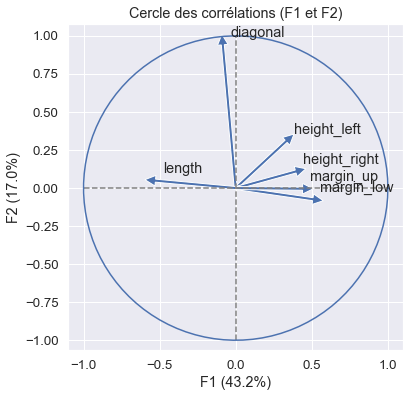

In [84]:
correlation_graph(pca, x_y, variables_ACP)

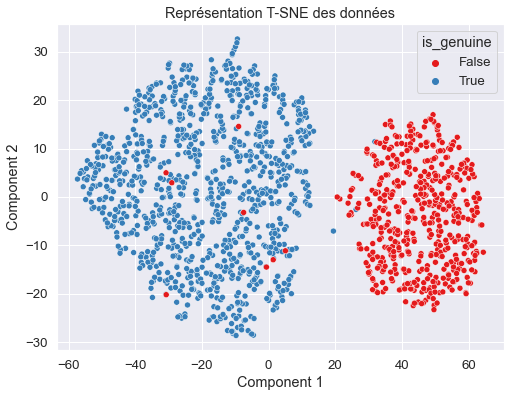

In [44]:
# représentation graphique des données sur deux composantes T-SNE
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


# Séparer les variables indépendantes
X = df.drop('is_genuine', axis=1)

# Standardisation des variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Réduction de dimension avec T-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Ajouter les classes à la DataFrame T-SNE
df_tsne = pd.DataFrame(data=X_tsne, columns=['Component 1', 'Component 2'])
df_tsne['is_genuine'] = df['is_genuine']

# Plot des composantes T-SNE avec couleurs
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Component 1', y='Component 2', hue='is_genuine', data=df_tsne, palette='Set1')
plt.title('Représentation T-SNE des données')
plt.show()

# Modelisation

In [47]:
# Créer la matrice X des données en supprimant la colonne des cibles
X = df.drop('is_genuine', axis=1)

# Créer la série y des cibles
y = df['is_genuine']

# Afficher X et y
print("Matrice X des données:")
print(X.head())
print("\nSérie y des cibles:")
print(y.head())

Matrice X des données:
   diagonal  height_left  height_right  margin_low  margin_up  length
0    171.81       104.86        104.95        4.52       2.89  112.83
1    171.46       103.36        103.66        3.77       2.99  113.09
2    172.69       104.48        103.50        4.40       2.94  113.16
3    171.36       103.91        103.94        3.62       3.01  113.51
4    171.73       104.28        103.46        4.04       3.48  112.54

Série y des cibles:
0    True
1    True
2    True
3    True
4    True
Name: is_genuine, dtype: bool


In [48]:
# Normalisation de type standars
# Séparer les variables indépendantes
X = df.drop('is_genuine', axis=1)

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Afficher les données normalisées
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print(df_scaled.head())

   diagonal  height_left  height_right  margin_low  margin_up    length
0 -0.486540     2.774123      3.163240    0.056324  -1.128325  0.173651
1 -1.633729    -2.236535     -0.799668   -1.080592  -0.696799  0.471666
2  2.397823     1.504756     -1.291191   -0.125583  -0.912562  0.551901
3 -1.961498    -0.399294      0.060498   -1.307975  -0.610494  0.953075
4 -0.748754     0.836669     -1.414072   -0.671303   1.417677 -0.158750


In [49]:
#diviser les données en train et test sets
from sklearn.model_selection import train_test_split

# Séparer les variables indépendantes et la cible
X = df.drop('is_genuine', axis=1)
y = df['is_genuine']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Afficher les dimensions des ensembles d'entraînement et de test
print("Dimensions de l'ensemble d'entraînement:")
print(X_train.shape, y_train.shape)
print("\nDimensions de l'ensemble de test:")
print(X_test.shape, y_test.shape)

Dimensions de l'ensemble d'entraînement:
(1125, 6) (1125,)

Dimensions de l'ensemble de test:
(375, 6) (375,)


In [50]:
#entrainer un premier modèle
from sklearn.model_selection import train_test_split  # Pour diviser les données en ensembles d'entraînement et de test
from sklearn.linear_model import LogisticRegression  # Pour l'apprentissage automatique avec la régression logistique
from sklearn.metrics import accuracy_score, confusion_matrix  # Pour évaluer les performances du modèle


# Séparer les variables indépendantes et la cible
X = df.drop('is_genuine', axis=1)
y = df['is_genuine']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Instancier le modèle de régression logistique
model_reg = LogisticRegression()

# Entraîner le modèle sur l'ensemble d'entraînement
model_reg.fit(X_train, y_train)

# Prédire les classes pour l'ensemble de test
y_pred = model_reg.predict(X_test)

 

In [51]:
# performance du modèle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculer l'exactitude (accuracy) du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude du modèle de régression logistique:", accuracy)

# Calculer la précision (precision) du modèle
precision = precision_score(y_test, y_pred)
print("Précision du modèle de régression logistique:", precision)

# Calculer le rappel (recall) du modèle
recall = recall_score(y_test, y_pred)
print("Rappel du modèle de régression logistique:", recall)

# Calculer le score F1 (F1 score) du modèle
f1 = f1_score(y_test, y_pred)
print("Score F1 du modèle de régression logistique:", f1)

# Calculer l'aire sous la courbe ROC (ROC AUC) du modèle
roc_auc = roc_auc_score(y_test, y_pred)
print("Aire sous la courbe ROC du modèle de régression logistique:", roc_auc)

Exactitude du modèle de régression logistique: 0.992
Précision du modèle de régression logistique: 0.9876543209876543
Rappel du modèle de régression logistique: 1.0
Score F1 du modèle de régression logistique: 0.9937888198757764
Aire sous la courbe ROC du modèle de régression logistique: 0.9888888888888888


# OPTIMISATION

In [52]:
#pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Créer le pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

In [53]:
# Définir la grille d'hyperparamètres à optimiser


param_grid = {
    'classifier__C': [1, 10, 100, 1000],
    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'classifier__random_state':[0]
}

In [54]:

# Effectuer la recherche d'hyperparamètres avec validation croisée
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Hyperparamètres réglés (meilleurs paramètres) :", grid_search.best_params_)


C:\Users\FINKE epse TAKOU\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\FINKE epse TAKOU\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\FINKE epse TAKOU\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\FINKE epse TAKOU\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the p

C:\Users\FINKE epse TAKOU\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\FINKE epse TAKOU\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\FINKE epse TAKOU\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\FINKE epse TAKOU\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\FINKE epse TAKOU\AppData\Roaming\Python\Python38\site-p

C:\Users\FINKE epse TAKOU\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\FINKE epse TAKOU\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\FINKE epse TAKOU\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\FINKE epse TAKOU\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\FINKE epse TAKOU\AppData\Roaming\Python\Python38\site-p

C:\Users\FINKE epse TAKOU\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\FINKE epse TAKOU\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\FINKE epse TAKOU\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\FINKE epse TAKOU\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\FINKE epse TAKOU\AppData\Roaming\Python\Python38\site-p

Hyperparamètres réglés (meilleurs paramètres) : {'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__random_state': 0, 'classifier__solver': 'liblinear'}


In [55]:
#performance du modèle
print("Taux de précision du modèle :",round(grid_search.best_score_*100,2),"%")



Taux de précision du modèle : 99.2 %


In [56]:
# coeficients du modèle
# Prédire les classes pour l'ensemble de test avec le modèle de base
y_pred_base =  grid_search.predict(X_test)

# Calculer les métriques pour le modèle de base
accuracy_base = accuracy_score(y_test, y_pred_base)
precision_base = precision_score(y_test, y_pred_base)
recall_base = recall_score(y_test, y_pred_base)
f1_base = f1_score(y_test, y_pred_base)
roc_auc_base = roc_auc_score(y_test, y_pred_base)

# Afficher les performances du modèle de base
print("Performances du modèle de base:")
print("Exactitude:", accuracy_base)
print("Précision:", precision_base)
print("Rappel:", recall_base)
print("Score F1:", f1_base)
print("Aire sous la courbe ROC:", roc_auc_base)

# Comparer avec les performances du meilleur modèle
print("\nPerformances du meilleur modèle:")
print("Exactitude:", accuracy)
print("Précision:", precision)
print("Rappel:", recall)
print("Score F1:", f1)
print("Aire sous la courbe ROC:", roc_auc)

Performances du modèle de base:
Exactitude: 0.9946666666666667
Précision: 0.9917355371900827
Rappel: 1.0
Score F1: 0.995850622406639
Aire sous la courbe ROC: 0.9925925925925926

Performances du meilleur modèle:
Exactitude: 0.992
Précision: 0.9876543209876543
Rappel: 1.0
Score F1: 0.9937888198757764
Aire sous la courbe ROC: 0.9888888888888888


In [57]:
# Accéder aux coefficients du modèle de régression logistique
from sklearn.linear_model import LogisticRegression

# Créer et entraîner le modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Accéder aux coefficients du modèle
coefficients = model.coef_

# Afficher les coefficients et les variables correspondantes
feature_names = X.columns
for feature_name, coef in zip(feature_names, coefficients[0]):
    print(f"{feature_name}: {coef}")

diagonal: -0.2589657395951013
height_left: -1.3662566294440313
height_right: -2.033839942811868
margin_low: -3.342594941242678
margin_up: -2.901970021794102
length: 3.7611538656852535


In [58]:
import pickle

# Enregistrer le meilleur modèle dans un fichier
from joblib import dump, load

dump(model_reg, 'regression_model_saved.pkl')

['regression_model_saved.pkl']